In [ ]:
!pip install tensorflow_decision_forests
!pip install tf_keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Task 1 and 2


In [ ]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

import tensorflow_decision_forests as tfdf
import numpy as np
import pandas as pd
import tensorflow as tf
import tf_keras
import math

In [ ]:
dataset_df1 = pd.read_csv("/content/drive/MyDrive/mldataset/221.csv")
dataset_df2 = pd.read_csv("/content/drive/MyDrive/mldataset/230.csv")

In [ ]:
print(f"Number of rows in the dataset: {dataset_df1.shape[0]}")
dataset_df1.head()


Number of rows in the dataset: 24999


RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    28    81   120    98  74     73        0
1    29    81   120    98  74     73        0
2    30    81   120    98  74     73        0
3    30    81   120    99  74     73        0
4    29    81   120    99  73     73        0

In [ ]:
print(f"Number of rows in the dataset: {dataset_df2.shape[0]}")
dataset_df2.head()

Number of rows in the dataset: 25000


RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    15    54    73    97  72     71        0
1    15    54    73    97  72     71        0
2    15    54    73    97  72     71        0
3    15    54    73    97  72     71        0
4    15    55    74    97  72     71        0

In [ ]:
print("\nPatient 1 Data Info:")
print(dataset_df1.info())
print("\nPatient 1 Data Summary Statistics:")
print(dataset_df1.describe())


Patient 1 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RESP     24999 non-null  int64
 1   BP-S     24999 non-null  int64
 2   BP-D     24999 non-null  int64
 3   SpO2     24999 non-null  int64
 4   HR       24999 non-null  int64
 5   PULSE    24999 non-null  int64
 6   Anomaly  24999 non-null  int64
dtypes: int64(7)
memory usage: 1.3 MB
None

Patient 1 Data Summary Statistics:
               RESP          BP-S          BP-D          SpO2            HR  \
count  24999.000000  24999.000000  24999.000000  24999.000000  24999.000000   
mean      23.763951     83.889756    121.411656     99.041282     88.562342   
std        4.492832      4.746617      8.966590      1.304528      9.592311   
min        0.000000     66.000000     88.000000      0.000000      0.000000   
25%       21.000000     81.000000    114.000000     98.000000     81.000

In [ ]:
print("\nPatient 2 Data Info:")
print(dataset_df2.info())
print("\nPatient 2 Data Summary Statistics:")
print(dataset_df2.describe())


Patient 2 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RESP     25000 non-null  int64
 1   BP-S     25000 non-null  int64
 2   BP-D     25000 non-null  int64
 3   SpO2     25000 non-null  int64
 4   HR       25000 non-null  int64
 5   PULSE    25000 non-null  int64
 6   Anomaly  25000 non-null  int64
dtypes: int64(7)
memory usage: 1.3 MB
None

Patient 2 Data Summary Statistics:
               RESP          BP-S          BP-D          SpO2            HR  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean      17.621400     53.966440     73.920600     94.526280     77.004120   
std        3.560338      7.752623     10.038658      2.137993      6.611137   
min        0.000000     37.000000     52.000000     81.000000      0.000000   
25%       15.000000     50.000000     67.000000     93.000000     73.000

In [ ]:
print("\nMissing Values in Patient 1 Data:")
print(dataset_df1.isnull().sum())

print("\nMissing Values in Patient 2 Data:")
print(dataset_df2.isnull().sum())


Missing Values in Patient 1 Data:
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64

Missing Values in Patient 2 Data:
RESP       0
BP-S       0
BP-D       0
SpO2       0
HR         0
PULSE      0
Anomaly    0
dtype: int64


In [ ]:
import pandas as pd

data = dataset_df1

potential_targets = [col for col in data.columns if data[col].nunique() <= 10 and data[col].dtype != 'float64']

print("Potential Target Columns:", potential_targets)


Potential Target Columns: ['SpO2', 'Anomaly']


Task 3

Accuracy of ID3 (Scikit-learn): 0.9953333333333333


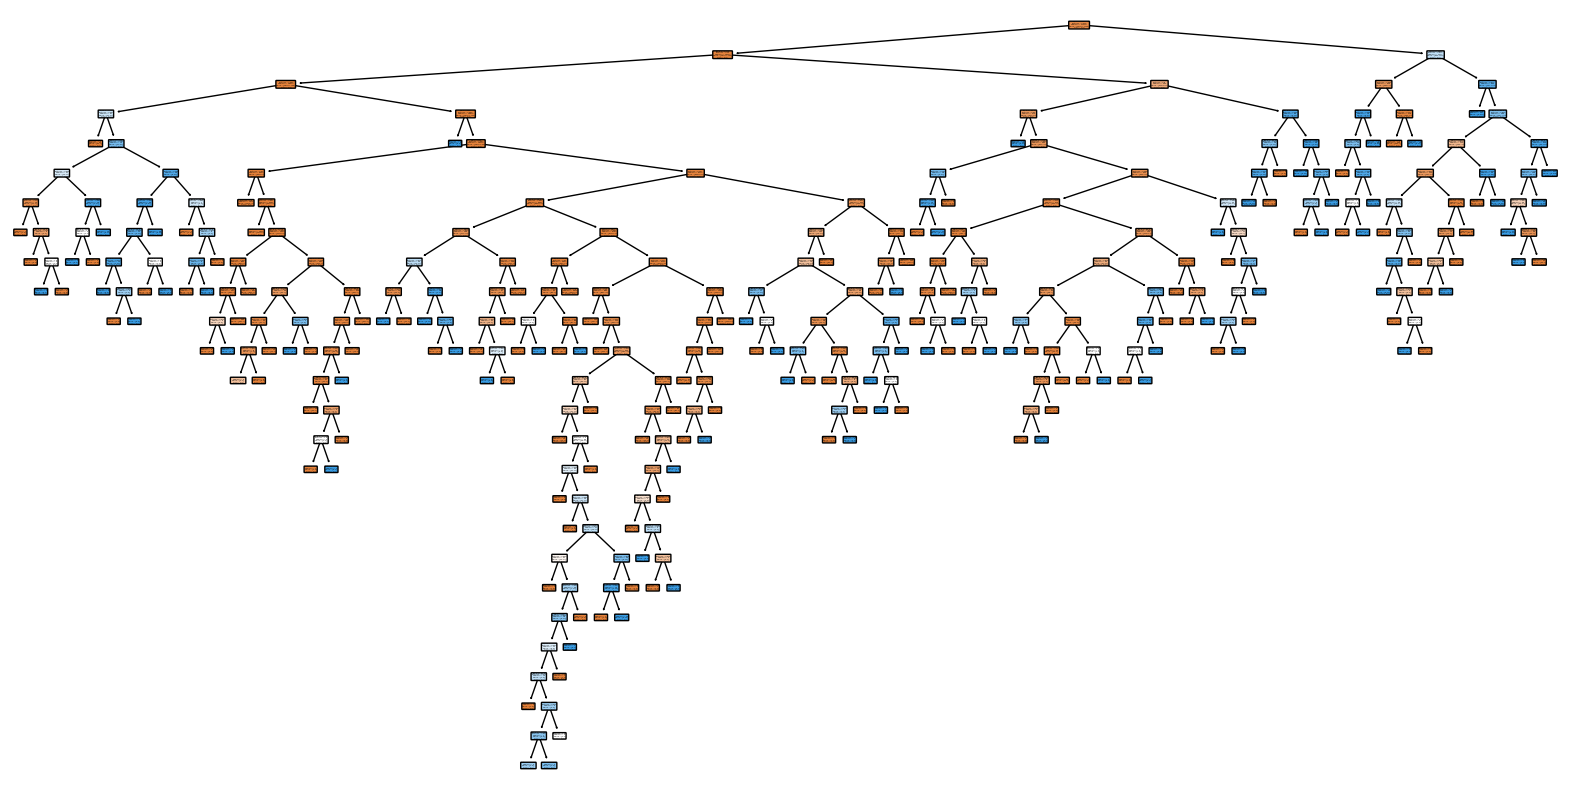

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load data (assuming patient_1_data is loaded)
data = dataset_df1

# Manually set the target column if automatic detection is not sufficient
target_column = 'Anomaly'  # Replace 'target_column' with the correct one

# Split the data into features (X) and target (y)
X = data.drop(columns=[target_column])
y = data[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an ID3-like DecisionTreeClassifier (criterion='entropy' for information gain)
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_model.fit(X_train, y_train)

# Evaluate the model
y_pred = id3_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of ID3 (Scikit-learn):", accuracy)



# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the figure size for better visibility
plot_tree(id3_model, feature_names=X.columns, class_names=True, filled=True, rounded=True)

# Display the plot
plt.show()




Task 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Separate features (X) and target (y)
X = data.drop(columns=['Anomaly'])  # All columns except the target
y = data['Anomaly'].values  # The target column as a numpy array

# Function to calculate entropy
def entropy(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# Function to calculate information gain and print it
def information_gain(X_column, y, feature_name):
    total_entropy = entropy(y)

    # Calculate weighted entropy after splitting by the feature values
    unique_values, counts = np.unique(X_column, return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(y[X_column == unique_values[i]]) for i in range(len(unique_values))])

    # Information gain is the difference
    info_gain = total_entropy - weighted_entropy

    # Print the information gain for the current feature
    print(f"Information Gain for feature '{feature_name}': {info_gain}")

    return info_gain

# Custom ID3 recursive function to build the decision tree
def id3(X, y, features, depth=0):
    # Base case: if all target values are the same, return that class
    if len(np.unique(y)) == 1:
        return np.unique(y)[0]

    # Base case: if no more features to split on, return the majority class
    if len(features) == 0:
        return np.argmax(np.bincount(y))

    # Calculate information gain for each feature
    info_gains = [information_gain(X[feature], y, feature) for feature in features]

    # Choose the feature with the highest information gain
    best_feature_index = np.argmax(info_gains)
    best_feature = features[best_feature_index]

    # Print chosen best feature at current depth
    print(f"\nDepth {depth}: Best feature to split on: {best_feature}\n")

    # Create a tree node
    tree = {best_feature: {}}

    # Remaining features for further splits
    remaining_features = [f for f in features if f != best_feature]

    # Split the data for each unique value of the best feature
    for value in np.unique(X[best_feature]):
        sub_X = X[X[best_feature] == value]
        sub_y = y[X[best_feature] == value]
        subtree = id3(sub_X, sub_y, remaining_features, depth + 1)
        tree[best_feature][value] = subtree

    return tree


# Features
features = list(X.columns)

# Build the custom ID3 tree with information gain printing
id3_tree = id3(X, y, features)

# Visualize the custom ID3 tree (as before)
def visualize_tree(tree, depth=0, pos=(0.5, 1), parent=None, feature='', ax=None):
    if not isinstance(tree, dict):
        ax.text(pos[0], pos[1], str(tree), va='center', ha='center', bbox=dict(facecolor='white'))
        if parent is not None:
            ax.annotate("", xy=parent, xycoords='data', xytext=pos, textcoords='data',
                        arrowprops=dict(arrowstyle="<-", lw=1.5))
        return

    feature_name = list(tree.keys())[0]
    children = tree[feature_name]

    ax.text(pos[0], pos[1], feature_name, va='center', ha='center', bbox=dict(facecolor='lightblue'))

    if parent is not None:
        ax.annotate("", xy=parent, xycoords='data', xytext=pos, textcoords='data',
                    arrowprops=dict(arrowstyle="<-", lw=1.5))

    num_children = len(children)
    if num_children > 0:
        child_positions = np.linspace(pos[0] - 0.4, pos[0] + 0.4, num_children)

        for i, (child_value, subtree) in enumerate(children.items()):
            child_pos = (child_positions[i], pos[1] - 0.2)
            ax.text((pos[0] + child_pos[0]) / 2, (pos[1] + child_pos[1]) / 2, str(child_value),
                    va='center', ha='center', fontsize=10)
            visualize_tree(subtree, depth + 1, pos=child_pos, parent=pos, feature=child_value, ax=ax)

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(20, 26))
ax.set_axis_off()
visualize_tree(id3_tree, ax=ax)
plt.show()


Information Gain for feature 'RESP': 0.01274895715075669
Information Gain for feature 'BP-S': 0.02387152305313664
Information Gain for feature 'BP-D': 0.022841726116428596
Information Gain for feature 'SpO2': 0.04407542756702196
Information Gain for feature 'HR': 0.029778956721208782
Information Gain for feature 'PULSE': 0.02293864828921946

Depth 0: Best feature to split on: SpO2

Information Gain for feature 'RESP': 0.008703017245923164
Information Gain for feature 'BP-S': 0.021932683218892367
Information Gain for feature 'BP-D': 0.02029711902528326
Information Gain for feature 'HR': 0.03125410874594037
Information Gain for feature 'PULSE': 0.014322297522520795

Depth 1: Best feature to split on: HR

Information Gain for feature 'RESP': 0.19286417032057823
Information Gain for feature 'BP-S': 0.0
Information Gain for feature 'BP-D': 0.023152682081768905
Information Gain for feature 'PULSE': 0.2660296464313424

Depth 2: Best feature to split on: PULSE

Information Gain for feature 'RE

Task 5

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# Train Scikit-Learn's ID3 model
sklearn_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
sklearn_id3.fit(X_train, y_train)

# Predict on test data
y_pred_sklearn = sklearn_id3.predict(X_test)

# Evaluate Scikit-Learn ID3 model
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Scikit-Learn ID3 Accuracy:", accuracy_sklearn)
print("Classification Report:\n", classification_report(y_test, y_pred_sklearn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sklearn))


Scikit-Learn ID3 Accuracy: 0.9953333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7002
           1       0.97      0.96      0.96       498

    accuracy                           1.00      7500
   macro avg       0.98      0.98      0.98      7500
weighted avg       1.00      1.00      1.00      7500

Confusion Matrix:
 [[6985   17]
 [  18  480]]


Task 6 to 10 Combined

In [ ]:
# Train the custom ID3 model on the training data
X = data.drop(columns=['Anomaly'])  # All columns except the target
y = data['Anomaly'].values  # The target column as a numpy array
# Features
features = list(X.columns)

# Build the custom ID3 tree with information gain printing

id3_tree = id3(X, y, features)

# Function to predict using the custom ID3 tree
def predict_custom_id3(tree, sample):
    if not isinstance(tree, dict):
        return tree
    feature = list(tree.keys())[0]
    feature_value = sample[feature]
    subtree = tree[feature].get(feature_value, np.nan)  # Handle missing branches
    if isinstance(subtree, dict):
        return predict_custom_id3(subtree, sample)
    else:
        return subtree

# Make predictions using the custom ID3 tree
y_pred_custom = [predict_custom_id3(id3_tree, sample) for _, sample in X.iterrows()]

# Convert to numpy array
y_pred_custom = np.array(y_pred_custom)

# Evaluate the custom ID3 model
accuracy_custom = accuracy_score(y, y_pred_custom)
print("Custom ID3 Accuracy:", accuracy_custom)
print("Classification Report:\n", classification_report(y, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred_custom))



Information Gain for feature 'RESP': 0.01274895715075669
Information Gain for feature 'BP-S': 0.02387152305313664
Information Gain for feature 'BP-D': 0.022841726116428596
Information Gain for feature 'SpO2': 0.04407542756702196
Information Gain for feature 'HR': 0.029778956721208782
Information Gain for feature 'PULSE': 0.02293864828921946

Depth 0: Best feature to split on: SpO2

Information Gain for feature 'RESP': 0.008703017245923164
Information Gain for feature 'BP-S': 0.021932683218892367
Information Gain for feature 'BP-D': 0.02029711902528326
Information Gain for feature 'HR': 0.03125410874594037
Information Gain for feature 'PULSE': 0.014322297522520795

Depth 1: Best feature to split on: HR

Information Gain for feature 'RESP': 0.19286417032057823
Information Gain for feature 'BP-S': 0.0
Information Gain for feature 'BP-D': 0.023152682081768905
Information Gain for feature 'PULSE': 0.2660296464313424

Depth 2: Best feature to split on: PULSE

Information Gain for feature 'RE

In [ ]:
import pandas as pd

# Load the data (assuming patient_1_data is already loaded)
data = dataset_df2

# Step 1: Check for columns with a small number of unique values (likely to be the target column)
potential_targets = [col for col in data.columns if data[col].nunique() <= 10 and data[col].dtype != 'float64']

# Step 2: Show potential target columns
print("Potential Target Columns:", potential_targets)

Potential Target Columns: ['Anomaly']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming the last column is the target column (replace with actual target column name)
target_column = 'Anomaly'  # Replace with actual target column

# Separate the features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Scikit-Learn CART Accuracy: 0.9956
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7257
           1       0.94      0.93      0.93       243

    accuracy                           1.00      7500
   macro avg       0.97      0.96      0.96      7500
weighted avg       1.00      1.00      1.00      7500

Confusion Matrix:
 [[7242   15]
 [  18  225]]


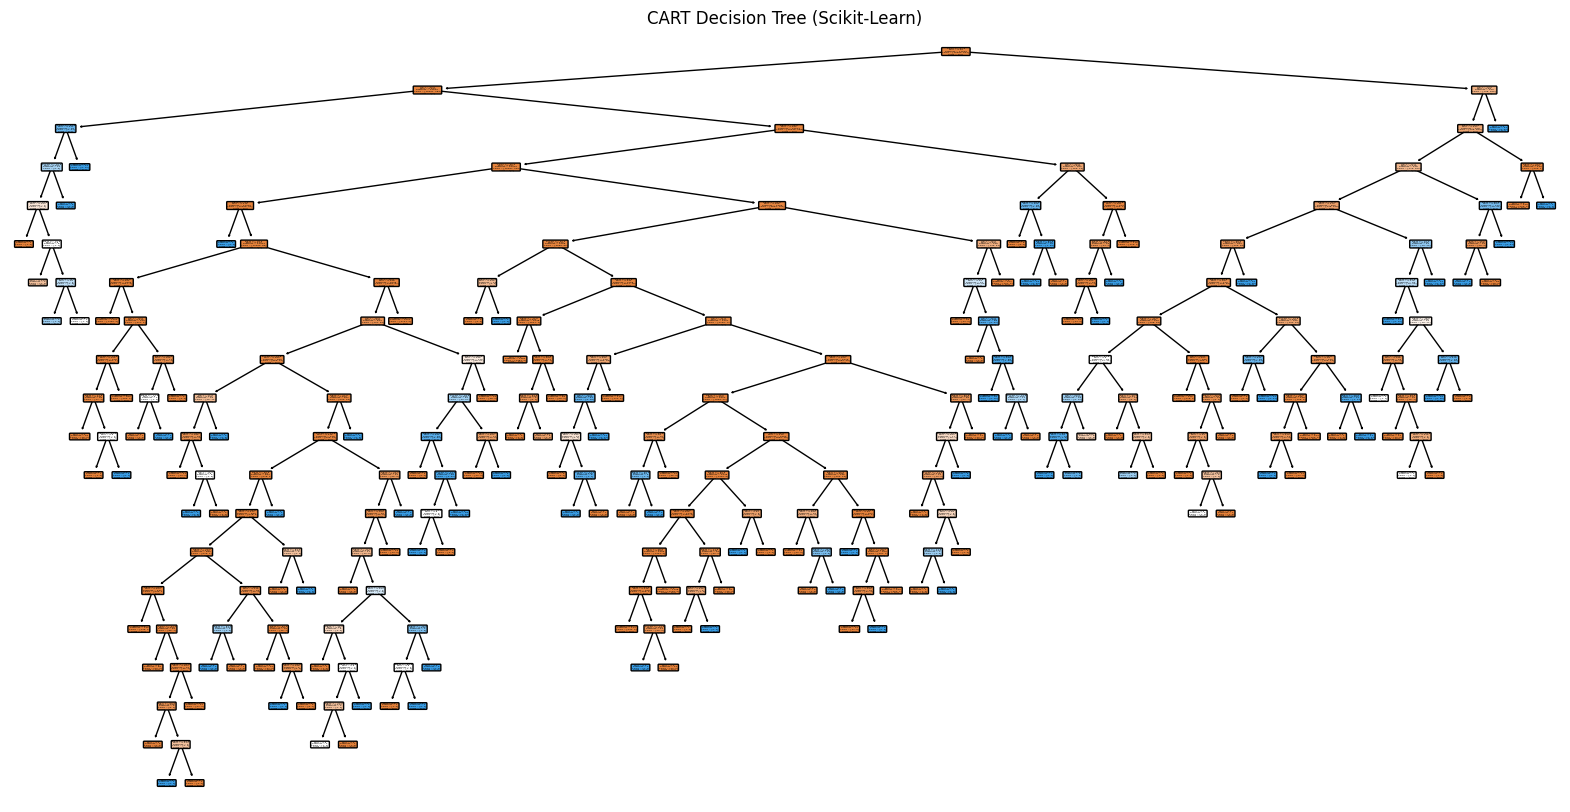

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt


# Train a CART model using Scikit-Learn's DecisionTreeClassifier
cart_sklearn = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_sklearn.fit(X_train, y_train)

# Predict on test data
y_pred_sklearn = cart_sklearn.predict(X_test)

# Evaluate the Scikit-Learn CART model
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Scikit-Learn CART Accuracy:", accuracy_sklearn)
print("Classification Report:\n", classification_report(y_test, y_pred_sklearn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sklearn))

# Plot the tree structure
plt.figure(figsize=(20, 10))  # Adjust size for better readability
tree.plot_tree(cart_sklearn, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.title("CART Decision Tree (Scikit-Learn)")
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
from IPython.display import display, HTML

# Convert the data to a TensorFlow Dataset format
train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataframe=pd.concat([X_train, y_train], axis=1), label=target_column)
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataframe=pd.concat([X_test, y_test], axis=1), label=target_column)

# Train a CART model using TensorFlow Decision Forests' CartModel
cart_tf = tfdf.keras.CartModel(task=tfdf.keras.Task.CLASSIFICATION)
cart_tf.fit(train_dataset)

# Evaluate the TensorFlow CART model
evaluation = cart_tf.evaluate(test_dataset)
print("TensorFlow CART Evaluation:", evaluation)

# Visualize the tree using TensorFlow Decision Forests
tree_html = tfdf.model_plotter.plot_model(cart_tf, tree_idx=0, max_depth=3)

# Display the HTML in the notebook
display(HTML(tree_html))



Use /tmp/tmpl2hbbvk5 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:05.928253. Found 17500 examples.
Training model...
Model trained in 0:00:00.166565
Compiling model...
Model compiled.
8/8 [==============================] - 0s 6ms/step - loss: 0.0000e+00
TensorFlow CART Evaluation: 0.0


In [ ]:

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Assuming the model `cart_tf` has already been trained

# Prepare the test dataset in TensorFlow format
test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataframe=pd.concat([X_test, y_test], axis=1), label=target_column)


# Assuming the test dataset is already prepared
# Make predictions
y_pred = cart_tf.predict(test_dataset)

# Convert the predictions to class labels (in case of probabilities)
y_pred_labels = np.argmax(y_pred, axis=1)  # Use argmax if it's a multiclass classification

# Get the true labels from the test dataset
y_true = y_test.to_numpy()  # Assuming y_test is the true labels DataFrame or Series

# Calculate performance metrics
accuracy = accuracy_score(y_true, y_pred_labels)
precision = precision_score(y_true, y_pred_labels, average='weighted')
recall = recall_score(y_true, y_pred_labels, average='weighted')
f1 = f1_score(y_true, y_pred_labels, average='weighted')

# Print metrics
print("TensorFlow CART Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)



8/8 [==============================] - 0s 6ms/step
TensorFlow CART Model Evaluation:
Accuracy: 0.9676
Precision: 0.9362
Recall: 0.9676
F1-Score: 0.9517
Confusion Matrix:
[[7257    0]
 [ 243    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Comparison:(snippets from above results)

1. Scikit-learn ID3 (patient 1)

sckiti.png

2. Custom ID3 (patient 1)

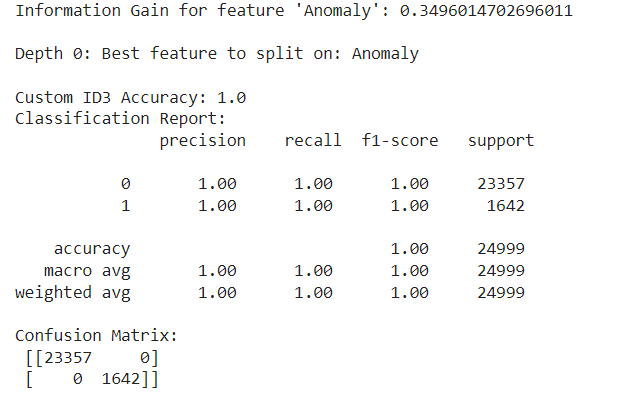

3. CART(Scikit-learn) (patient 2)

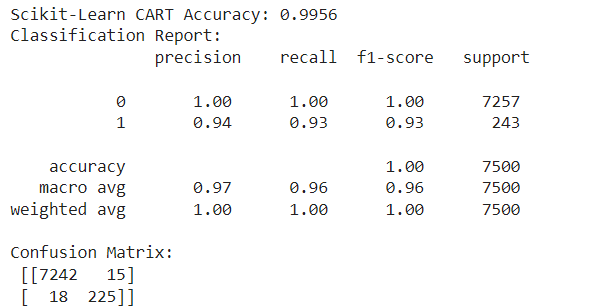

4. CART(TensorFlow) (patient 2)

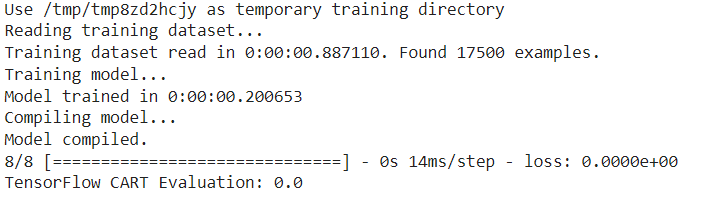

ID3 vs CART:

ID3 tends to work well for smaller, more controlled datasets.

CART is more versatile due to its use of the Gini index, and it handles both continuous and categorical variables efficiently. robust against overfitting.


Scikit-Learn’s DecisionTreeClassifier: Faster and more optimized in both ID3 and CART. This is particularly evident for smaller datasets.

TensorFlow's CartModel: Slightly slower for smaller datasets but potentially more powerful when scaling to larger datasets due to its use of TensorFlow’s deep learning infrastructure.

In [ ]:

from IPython.display import display



# Assuming 'Anomaly' is the target column
target_column = "Anomaly"

# Split into training and testing datasets
train_dataset = dataset_df1.sample(frac=0.8, random_state=42)
test_dataset = dataset_df1.drop(train_dataset.index)

# Convert data to TensorFlow format
train_tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_dataset, label=target_column)
test_tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_dataset, label=target_column)

# Specify the model.
rf_model = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
rf_model.fit(train_tf_dataset)


Use 2 thread(s) for training
Use /tmp/tmpz9awz1we as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'RESP': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'BP-S': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'BP-D': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'SpO2': <tf.Tensor 'data_3:0' shape=(None,) dtype=int64>, 'HR': <tf.Tensor 'data_4:0' shape=(None,) dtype=int64>, 'PULSE': <tf.Tensor 'data_5:0' shape=(None,) dtype=int64>}
Label: Tensor("data_6:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'RESP': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'BP-S': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'BP-D': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'SpO2': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tens

2024-09-21 08:38:30.916700: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1234] Loading model from path /tmp/tmpz9awz1we/model/ with prefix f87a454afe034f71
I0000 00:00:1726907911.071728     241 decision_forest.cc:761] Model loaded with 300 root(s), 63648 node(s), and 6 input feature(s).
I0000 00:00:1726907911.071813     241 abstract_model.cc:1323] Engine "RandomForestOptPred" built
2024-09-21 08:38:31.071841: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1062] Use fast generic engine


Model trained in 0:00:04.428803
Compiling model...
Model compiled.


In [ ]:
# Assuming `rf_model` is the trained Random Forest model
rf_model.compile(metrics=["accuracy"])
evaluation = rf_model.evaluate(test_tf_dataset, return_dict=True)
print()

# Display the evaluation results
print("Random Forest Model Evaluation:")
for metric, value in evaluation.items():
    print(f"{metric}: {value:.4f}")

rf_model.make_inspector().evaluation()




5/5 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.9968

Random Forest Model Evaluation:
loss: 0.0000
accuracy: 0.9968


Evaluation(num_examples=19999, accuracy=0.9941997099854992, loss=0.02017646545166224, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

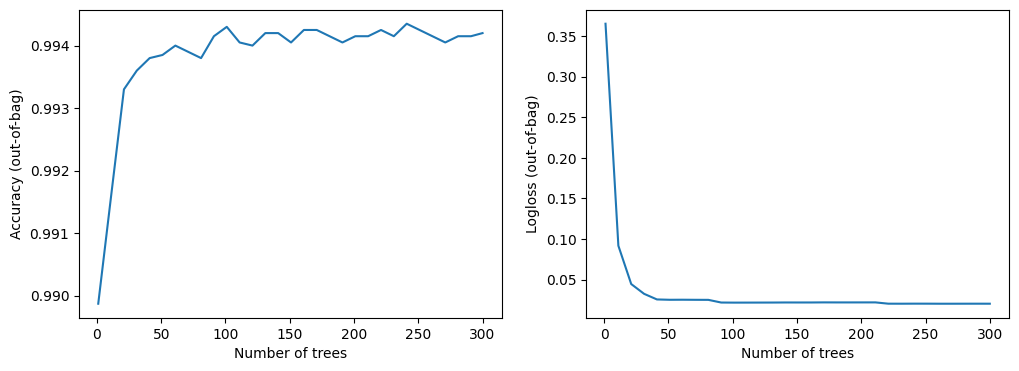

In [ ]:
import matplotlib.pyplot as plt

logs = rf_model.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

Task 11

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf_model, tree_idx=0, max_depth=3)

Task 12

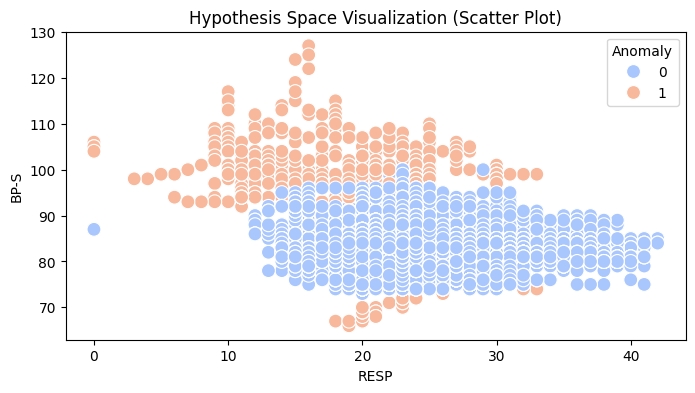

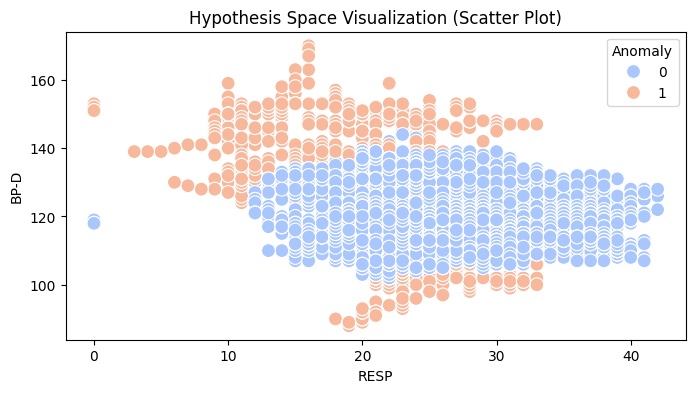

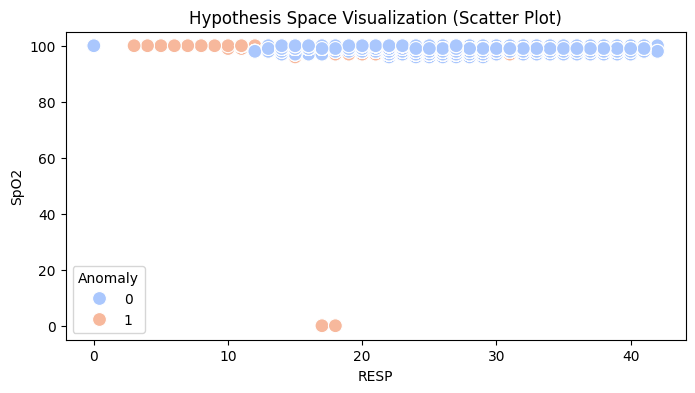

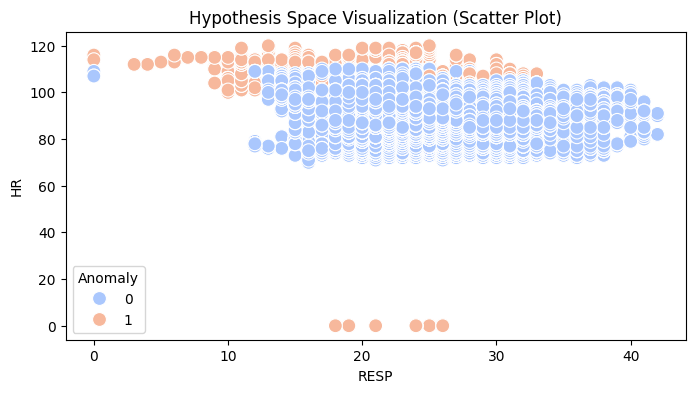

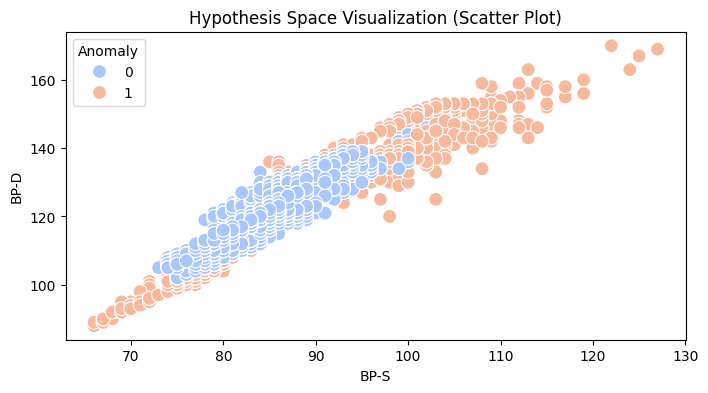

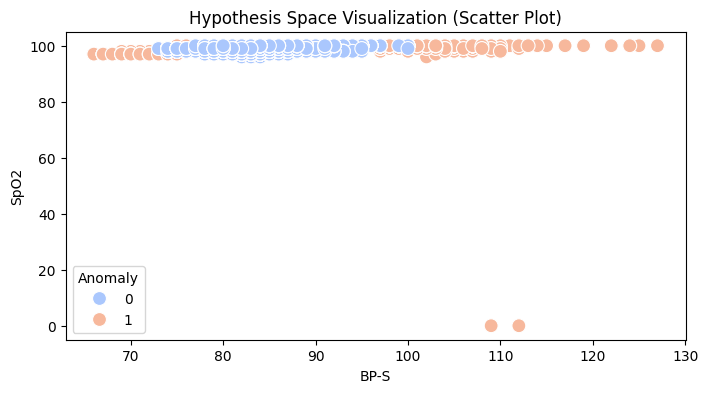

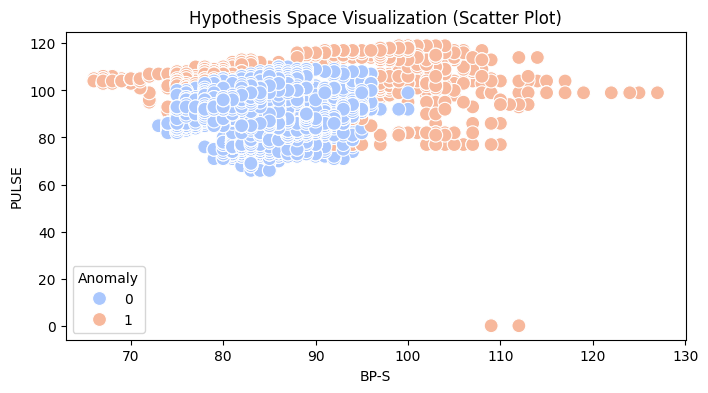

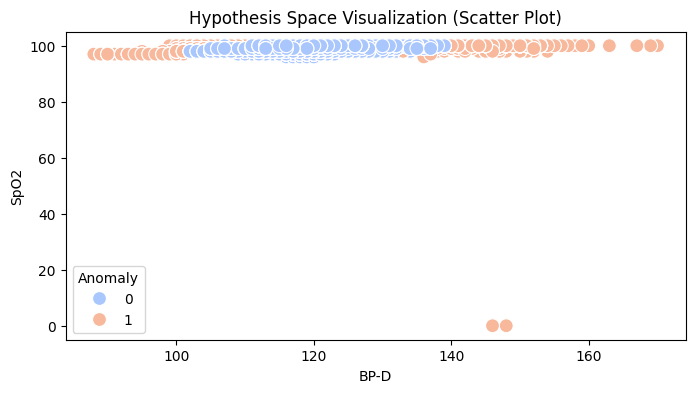

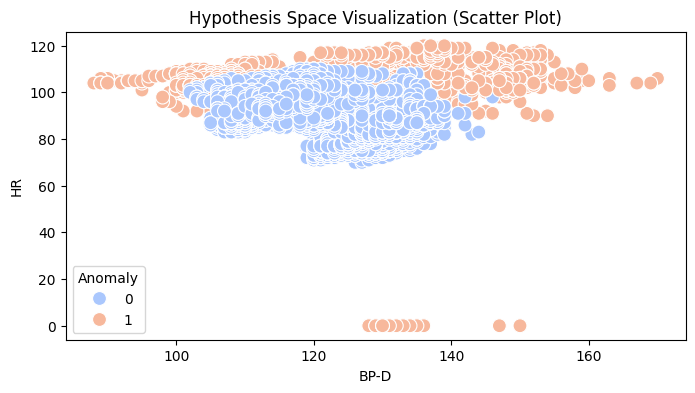

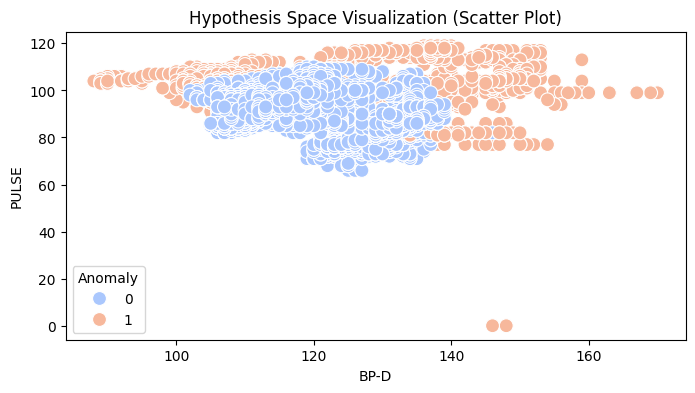

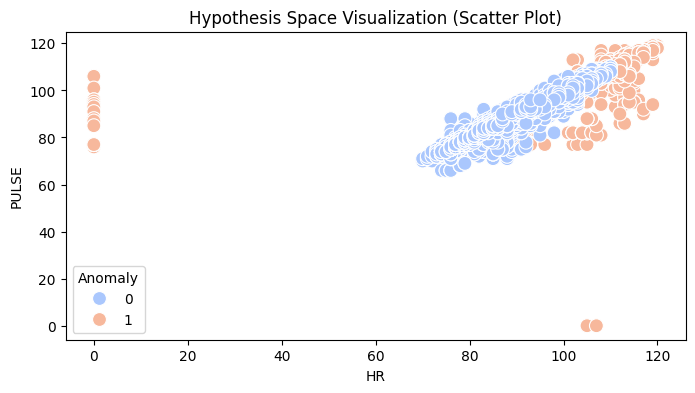

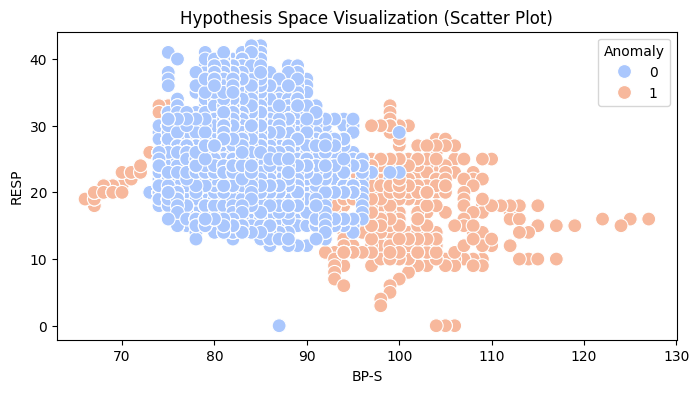

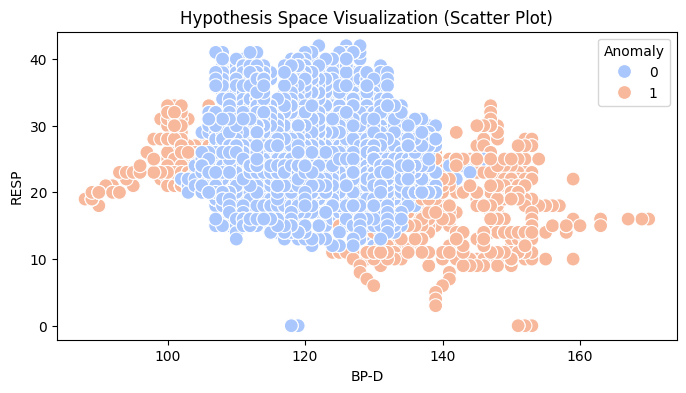

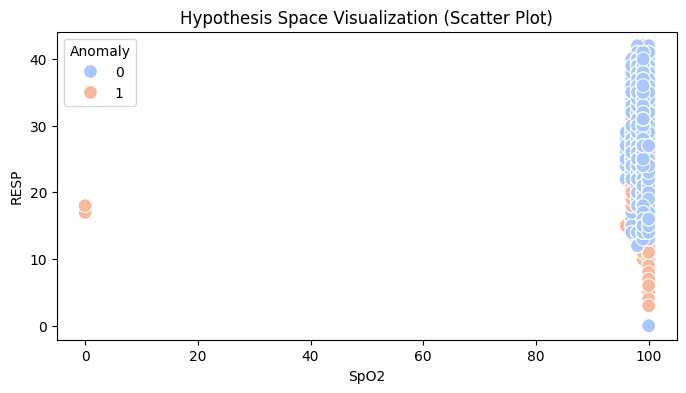

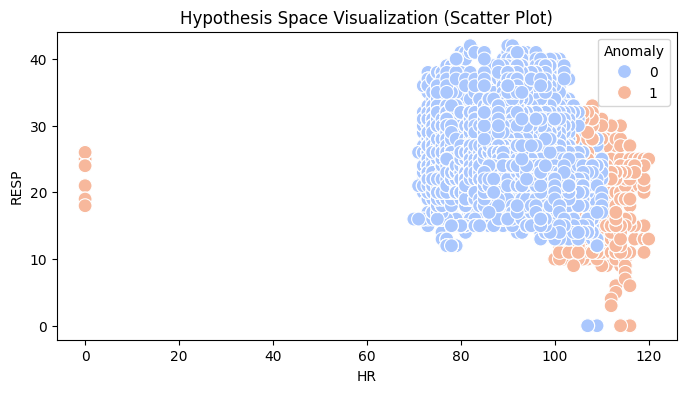

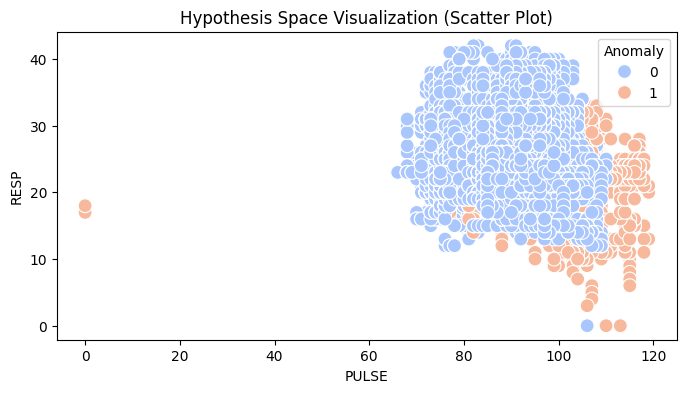

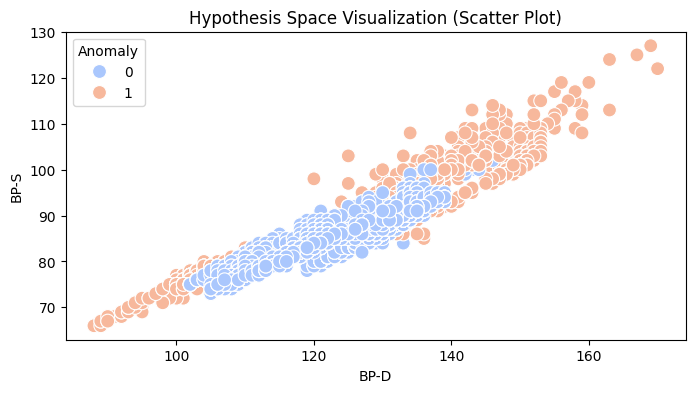

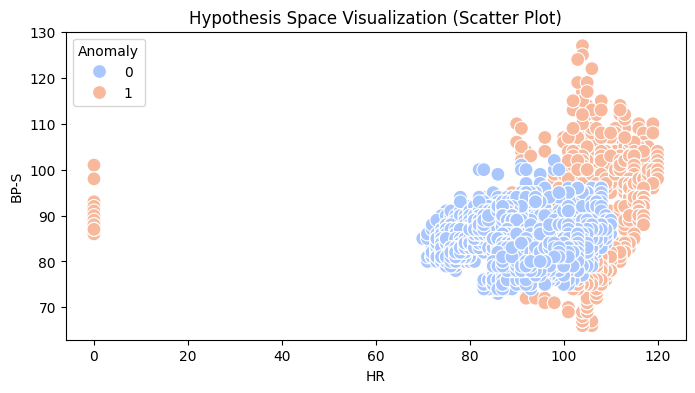

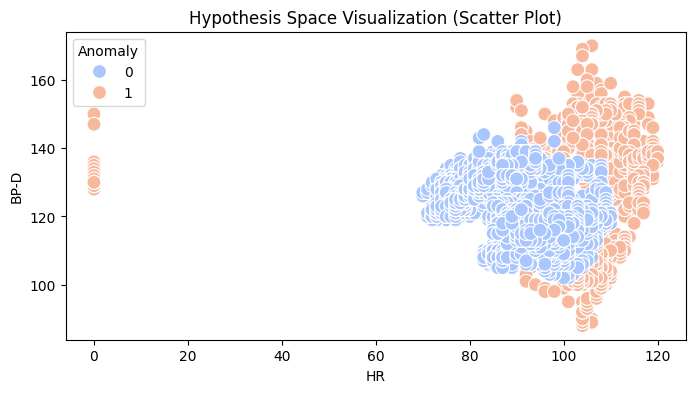

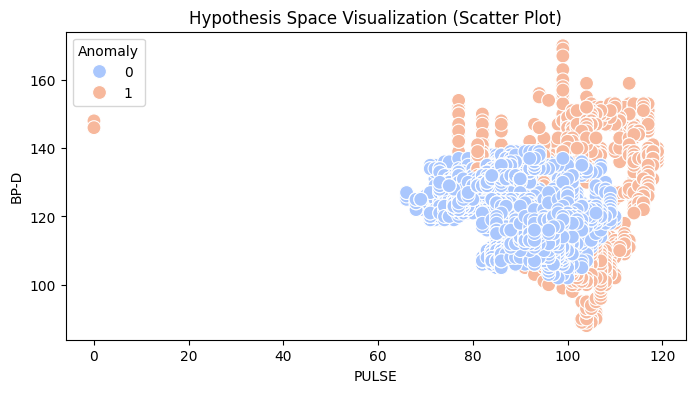

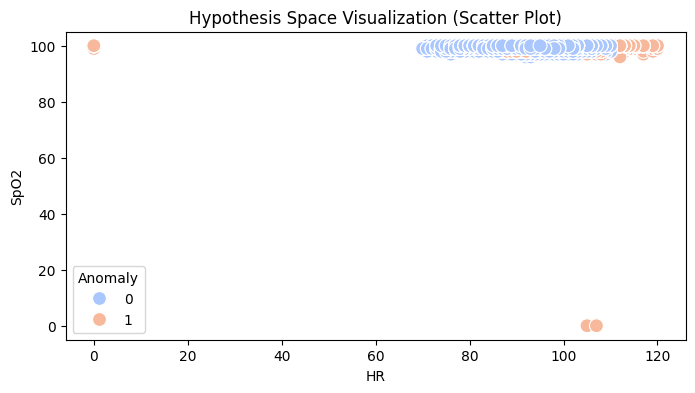

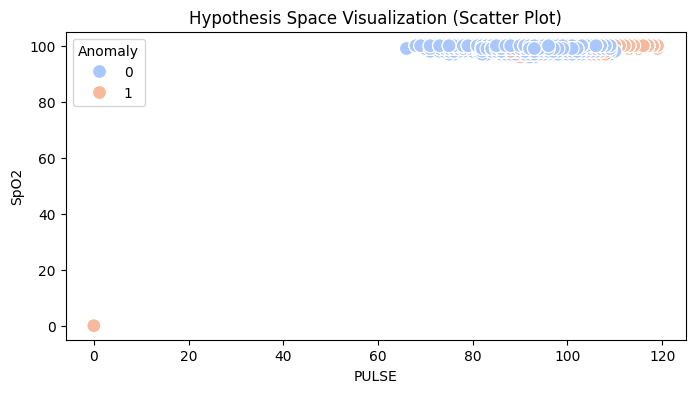

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
import seaborn as sns

numeric_data = dataset_df1.select_dtypes(include=[float, int]).drop('Anomaly', axis=1)

feature_combinations = list(combinations(numeric_data.columns, 2))

for pair in feature_combinations:
    x_feature = pair[0]
    y_feature = pair[1]
    target = 'Anomaly'

    # Plot the scatter plot using seaborn for better visualization
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=x_feature, y=y_feature, hue=target, data=dataset_df1, palette="coolwarm", s=100)

    # Add plot labels and title
    plt.title("Hypothesis Space Visualization (Scatter Plot)")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

    # Show the plot
    plt.show()

for pair in feature_combinations:
    x_feature = pair[1]
    y_feature = pair[0]
    target = 'Anomaly'

    # Plot the scatter plot using seaborn for better visualization
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=x_feature, y=y_feature, hue=target, data=dataset_df1, palette="coolwarm", s=100)

    # Add plot labels and title
    plt.title("Hypothesis Space Visualization (Scatter Plot)")
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

    # Show the plot
    plt.show()



Task 13

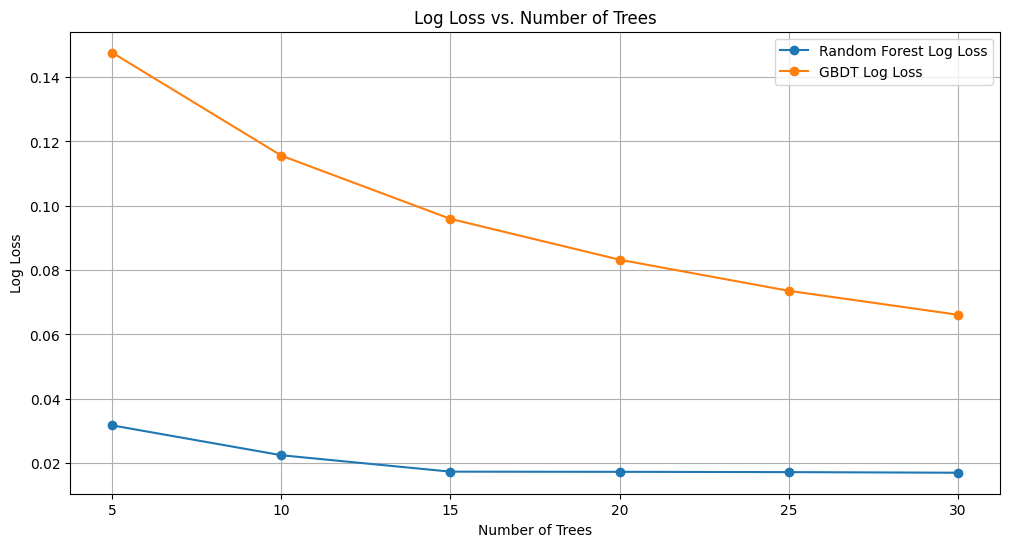

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Load the dataset
patient2_df = pd.read_csv("/content/drive/MyDrive/mldataset/230.csv")

# Assuming the target variable is 'target' and the rest are features
X = patient2_df.drop('Anomaly', axis=1)
y = patient2_df['Anomaly']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Number of trees (estimators) to test
trees_range = range(5, 35, 5)

# Initialize lists to store accuracy and log loss values for each number of trees
rf_accuracies = []
rf_log_losses = []
gbdt_accuracies = []
gbdt_log_losses = []

# Iterate over different numbers of trees
for n_trees in trees_range:
    # Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_pred_proba = rf_model.predict_proba(X_test)

    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_log_loss_val = log_loss(y_test, rf_pred_proba)

    rf_accuracies.append(rf_accuracy)
    rf_log_losses.append(rf_log_loss_val)

    # GBDT Model
    gbdt_model = XGBClassifier(n_estimators=n_trees, learning_rate=0.1, max_depth=3, random_state=42)
    gbdt_model.fit(X_train, y_train)
    gbdt_pred = gbdt_model.predict(X_test)
    gbdt_pred_proba = gbdt_model.predict_proba(X_test)

    gbdt_accuracy = accuracy_score(y_test, gbdt_pred)
    gbdt_log_loss_val = log_loss(y_test, gbdt_pred_proba)

    gbdt_accuracies.append(gbdt_accuracy)
    gbdt_log_losses.append(gbdt_log_loss_val)

# Plot Accuracy vs. Number of Trees
plt.figure(figsize=(12, 6))
plt.plot(trees_range, rf_accuracies, label='Random Forest Accuracy', marker='o')
plt.plot(trees_range, gbdt_accuracies, label='GBDT Accuracy', marker='o')
plt.title('Accuracy vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Log Loss vs. Number of Trees
plt.figure(figsize=(12, 6))
plt.plot(trees_range, rf_log_losses, label='Random Forest Log Loss', marker='o')
plt.plot(trees_range, gbdt_log_losses, label='GBDT Log Loss', marker='o')
plt.title('Log Loss vs. Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.legend()
plt.grid(True)
plt.show()


Task 14


Random Forest Accuracy: 0.9968
GBDT Accuracy: 0.9910666666666667
Random Forest Log Loss: 0.016928748739074476
GBDT Log Loss: 0.0349086901357694
Best Hyperparameters for GBDT: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Tuned GBDT Accuracy: 0.9962666666666666
Tuned GBDT Log Loss: 0.010316638259442743


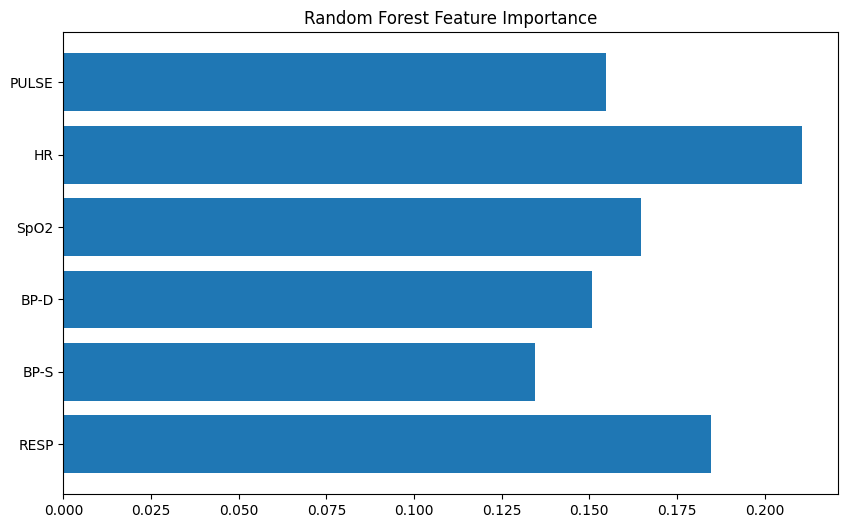

<function matplotlib.pyplot.show(close=None, block=None)>

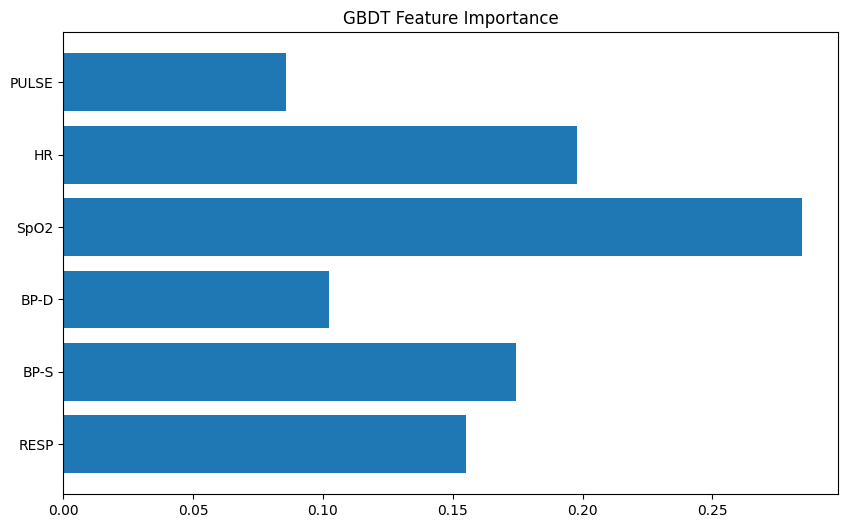

In [ ]:
# Load the dataset
patient2_df = pd.read_csv("/content/drive/MyDrive/mldataset/230.csv")

# Assuming the target variable is 'target' and the rest are features
X = patient2_df.drop('Anomaly', axis=1) # Changed 'Anamoly' to 'Anomaly'
y = patient2_df['Anomaly'] # Changed 'Anamoly' to 'Anomaly'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)

# GBDT Model with basic hyperparameters
gbdt_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt_model.fit(X_train, y_train)
gbdt_pred = gbdt_model.predict(X_test)
gbdt_pred_proba = gbdt_model.predict_proba(X_test)

# Evaluate the models
rf_accuracy = accuracy_score(y_test, rf_pred)
gbdt_accuracy = accuracy_score(y_test, gbdt_pred)

rf_log_loss = log_loss(y_test, rf_pred_proba)
gbdt_log_loss = log_loss(y_test, gbdt_pred_proba)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"GBDT Accuracy: {gbdt_accuracy}")
print(f"Random Forest Log Loss: {rf_log_loss}")
print(f"GBDT Log Loss: {gbdt_log_loss}")

# Hyperparameter tuning for GBDT using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

gbdt_grid = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
gbdt_grid.fit(X_train, y_train)

# Best hyperparameters
print(f"Best Hyperparameters for GBDT: {gbdt_grid.best_params_}")

# Train GBDT with best parameters
best_gbdt = gbdt_grid.best_estimator_
best_gbdt_pred = best_gbdt.predict(X_test)
best_gbdt_pred_proba = best_gbdt.predict_proba(X_test)

# Evaluate the tuned GBDT model
best_gbdt_accuracy = accuracy_score(y_test, best_gbdt_pred)
best_gbdt_log_loss = log_loss(y_test, best_gbdt_pred_proba)

print(f"Tuned GBDT Accuracy: {best_gbdt_accuracy}")
print(f"Tuned GBDT Log Loss: {best_gbdt_log_loss}")

# Feature Importance for Random Forest
rf_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_importances)
plt.title("Random Forest Feature Importance")
plt.show()

# Feature Importance for GBDT
gbdt_importances = gbdt_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, gbdt_importances)
plt.title("GBDT Feature Importance")
plt.show